<a href="https://colab.research.google.com/github/frommasidur/computerVision/blob/main/Task_13112021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [127]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***1. Write a program to get the adaptive threshold to convert any grey image to the corresponding
black and white image.***

In [128]:
def getThreshold(img):
  max = img.max()
  min = img.min()
  diff = max - min
  return min+diff//2

In [129]:
def convertToBW(img):
  bwImg = img
  th = getThreshold(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(img[i][j] >= th):
        bwImg[i][j] = 255
      else:
        bwImg[i][j] = 0
  return bwImg  

In [130]:
I = cv2.imread('/content/drive/Othercomputers/My Laptop/MCA/3 rd SEM/MCA T35 E-II Computer Vision _Satyabrata Maity/Image Processing/lowContrast.jpg',0)

min 122 max 218
170
Gray image


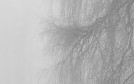

Black & white


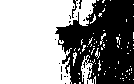

In [131]:
print("min",I.min(),"max",I.max())
print(getThreshold(I))
print("Gray image")
cv2_imshow(I)
print("Black & white")
b = convertToBW(I)
cv2_imshow(b)

min 6 max 255
Threshold  130
Gray image


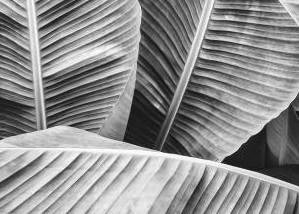

Black & white


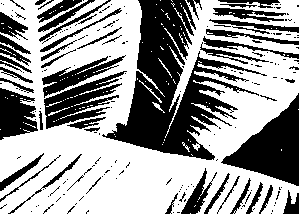

In [140]:
I2 = cv2.imread('/content/drive/Othercomputers/My Laptop/MCA/3 rd SEM/MCA T35 E-II Computer Vision _Satyabrata Maity/Image Processing/GrayImage.jpg',0)
print("min",I2.min(),"max",I2.max())
print("Threshold ",getThreshold(I2))
print("Gray image")
cv2_imshow(I2)
print("Black & white")
b = convertToBW(I2)
cv2_imshow(b)

**2 Make your own method to implement contrast stretching in a given image.**


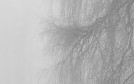

In [133]:
I = cv2.imread('/content/drive/Othercomputers/My Laptop/MCA/3 rd SEM/MCA T35 E-II Computer Vision _Satyabrata Maity/Image Processing/lowContrast.jpg',0)
cv2_imshow(I)

In [134]:
def contrastStreching(img):
  #Iarr = img.flatten()
  max = img.max()
  min = img.min()
  mf = 255/(max-min)
  newImg = np.zeros(img.shape,dtype="uint8")
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      newImg[i][j] = (img[i][j] - min)*mf
  return newImg


Before contrast streching


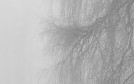

After contrast streching


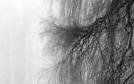

In [135]:
print("Before contrast streching")
cv2_imshow(I)
newImg = contrastStreching(I)
print("After contrast streching")
cv2_imshow(newImg)


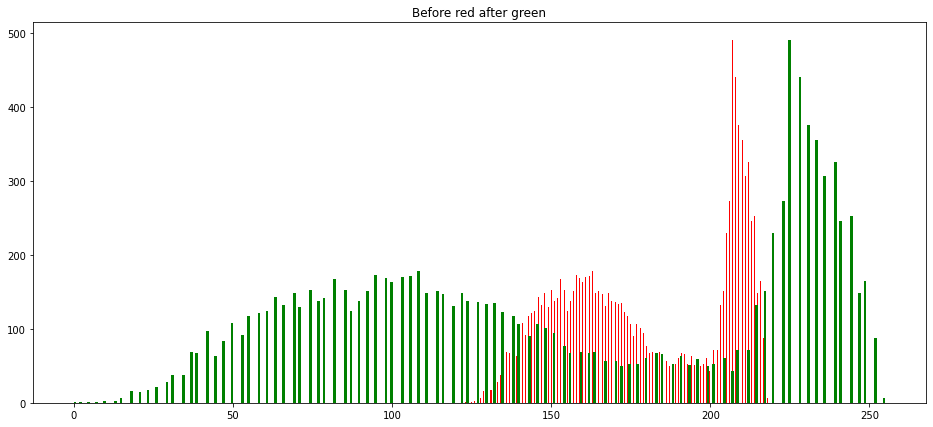

In [136]:
fig,ax = plt.subplots(figsize=(16,7))
ax.hist(I.flatten(), bins=300, color = 'red')
ax.hist(newImg.flatten(), bins=300, color ='green')
ax.set_title("Before red after green")
plt.show()

**3. Remove the unnecessary area of an image using adaptive grey level slicing. The area contains
lower intensity value is called unnecessary area.**

In [137]:
def removeIntensity(img, sf, ef):
  newImg = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] not in range(sf,ef):
        newImg[i][j] = img[i][j]
  return newImg

Before slicing


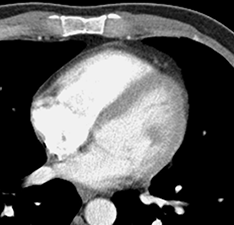

After slicing


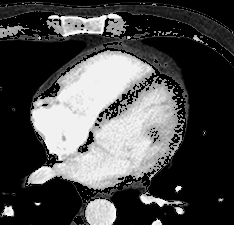

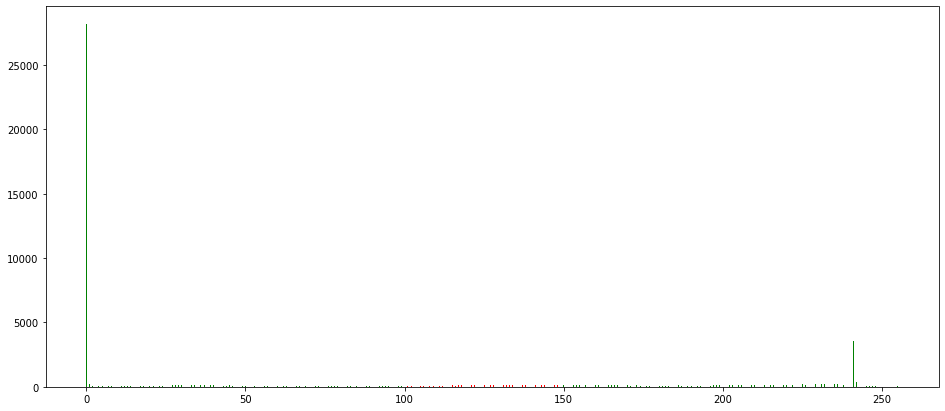

In [138]:
I3 = cv2.imread('/content/drive/Othercomputers/My Laptop/MCA/3 rd SEM/MCA T35 E-II Computer Vision _Satyabrata Maity/Image Processing/Brain1.png',0)
print("Before slicing") 
cv2_imshow(I3) 
print("After slicing") 
slicedImg = removeIntensity(I3,100,150) 
cv2_imshow(slicedImg) 

fig2, ax2 = plt.subplots(figsize=(16,7))
ax2.hist(I3.flatten(),bins= 1400, color="red")
ax2.hist(slicedImg.flatten(),bins=1400, color = "green")
plt.show()

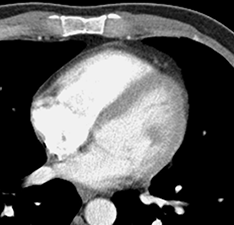

After removed Intensity


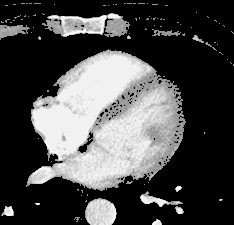

In [139]:
cv2_imshow(I3)
print("After removed Intensity")
cv2_imshow(removeIntensity(I3,0,140))